## Part1 PyTorch LSTM

### Task1

As you’ve seen in the previous assignment, RNNs are unable to memorise long sequences. So, in this first part of assignment 3, you will improve on your palindrome task by implementing an LSTM instead.

In this default case, I implement the LSTM model with the Palindromes' length of **11**. (T = 11)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import time
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.argv=['']
del sys

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F

from dataset import PalindromeDataset
from lstm import LSTM

In [2]:
def accuracy(outputs, batch_targets):
    """
    Computes the prediction accuracy, i.e., the average of correct predictions
    of the network.
    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        labels: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding of ground-truth labels
    Returns:
        accuracy: scalar float, the accuracy of predictions.
    """

    _, predicted = torch.max(outputs.data, 1)
    total = batch_targets.size(0)
    correct = (predicted == batch_targets).sum().item()
    accuracy = 100.0 * correct / total
    
    return accuracy

In [3]:
def train(config, input_length):

    # Initialize the model that we are going to use
    model = LSTM(input_length, config.input_dim, config.num_hidden, config.num_classes, config.batch_size)  # fixme

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Initialize the dataset and data loader (leave the +1)
    dataset = PalindromeDataset(input_length+1)
    data_loader = DataLoader(dataset, config.batch_size, num_workers=1)

    # Setup the loss and optimizer
    criterion = nn.CrossEntropyLoss()  # fixme
    optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)  # fixme
#     optimizer = torch.optim.RMSprop(model.parameters(), lr=config.learning_rate)
    
    losses = []
    accuracies = []
    loss = 0.0


    for step, (batch_inputs, batch_targets) in enumerate(data_loader):

        # Add more code here ...
        optimizer.zero_grad() 
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)   

        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()

        # the following line is to deal with exploding gradients
        torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)

        # Add more code here ...

        loss += loss.item()   # fixme
        accu = 0.0  # fixme
        

        if step % 10 == 0:
            # print acuracy/loss here
            print('[step: %5d] loss: %.4f' %
                          (step, loss / 10))
            losses.append(loss / 10)
            loss = 0.0
            accu = accuracy(outputs, batch_targets)
            accuracies.append(accu)
            print('Accuracy on training dataset: %.3f %%' % (accu))


        if step == config.train_steps:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            break

    print('Done training.')
    
    return model, losses, accuracies

In [4]:
if __name__ == "__main__":

    # Parse training configuration
    parser = argparse.ArgumentParser()

    # Model params
    parser.add_argument('--input_length', type=int, default=10, help='Length of an input sequence')
    parser.add_argument('--input_dim', type=int, default=1, help='Dimensionality of input sequence')
    parser.add_argument('--num_classes', type=int, default=10, help='Dimensionality of output sequence')
    parser.add_argument('--num_hidden', type=int, default=128, help='Number of hidden units in the model')
    parser.add_argument('--batch_size', type=int, default=128, help='Number of examples to process in a batch')
    parser.add_argument('--learning_rate', type=float, default=0.001, help='Learning rate')
    parser.add_argument('--train_steps', type=int, default=10000, help='Number of training steps')
    parser.add_argument('--max_norm', type=float, default=10.0)

    config = parser.parse_args()

In [5]:
model, losses, accuracies = train(config, config.input_length)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/wangyutong/Repository/store/CS/大三下/深度学习/lab/Assignment3/Part1/lstm.py:72: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y = F.softmax(output)
__main__:35: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4605
Accuracy on training dataset: 7.812 %
[step:    10] loss: 0.4605
Accuracy on training dataset: 9.375 %
[step:    20] loss: 0.4600
Accuracy on training dataset: 10.938 %
[step:    30] loss: 0.4612
Accuracy on training dataset: 5.469 %
[step:    40] loss: 0.4604
Accuracy on training dataset: 11.719 %
[step:    50] loss: 0.4609
Accuracy on training dataset: 12.500 %
[step:    60] loss: 0.4603
Accuracy on training dataset: 11.719 %
[step:    70] loss: 0.4586
Accuracy on training dataset: 10.156 %
[step:    80] loss: 0.4559
Accuracy on training dataset: 20.312 %
[step:    90] loss: 0.4529
Accuracy on training dataset: 14.062 %
[step:   100] loss: 0.4403
Accuracy on training dataset: 22.656 %
[step:   110] loss: 0.4295
Accuracy on training dataset: 28.125 %
[step:   120] loss: 0.4281
Accuracy on training dataset: 29.688 %
[step:   130] loss: 0.4268
Accuracy on training dataset: 30.469 %
[step:   140] loss: 0.4304
Accuracy on training dataset: 28.125 %
[step:   150]

[step:  1250] loss: 0.3136
Accuracy on training dataset: 89.062 %
[step:  1260] loss: 0.3106
Accuracy on training dataset: 90.625 %
[step:  1270] loss: 0.3166
Accuracy on training dataset: 87.500 %
[step:  1280] loss: 0.3091
Accuracy on training dataset: 91.406 %
[step:  1290] loss: 0.3136
Accuracy on training dataset: 89.062 %
[step:  1300] loss: 0.3121
Accuracy on training dataset: 89.844 %
[step:  1310] loss: 0.2985
Accuracy on training dataset: 96.875 %
[step:  1320] loss: 0.3106
Accuracy on training dataset: 90.625 %
[step:  1330] loss: 0.3060
Accuracy on training dataset: 92.969 %
[step:  1340] loss: 0.3120
Accuracy on training dataset: 89.844 %
[step:  1350] loss: 0.3120
Accuracy on training dataset: 89.844 %
[step:  1360] loss: 0.3165
Accuracy on training dataset: 87.500 %
[step:  1370] loss: 0.3135
Accuracy on training dataset: 89.062 %
[step:  1380] loss: 0.3150
Accuracy on training dataset: 88.281 %
[step:  1390] loss: 0.3120
Accuracy on training dataset: 89.844 %
[step:  14

[step:  2480] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2490] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2500] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2510] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2520] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2530] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2540] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2550] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2560] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2570] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2580] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2590] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2600] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2610] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2620] loss: 0.2923
Accuracy on training dataset: 100.0

[step:  3710] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3720] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3730] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3740] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3750] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3760] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3770] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3780] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3790] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3800] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3810] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3820] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3830] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3840] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  3850] loss: 0.2923
Accuracy on training dataset: 100.0

[step:  4940] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4950] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4960] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4970] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4990] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5000] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5010] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5020] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5030] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5040] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5050] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5060] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5070] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5080] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  6170] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6180] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6190] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6200] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6210] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6220] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6230] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6240] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6250] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6260] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6270] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6280] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6290] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6300] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6310] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  7400] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7410] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7420] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7430] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7440] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7450] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7460] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7470] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7480] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7490] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7500] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7510] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7520] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7530] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7540] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  8630] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8640] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8650] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8660] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8670] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8680] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8690] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8700] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8710] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8720] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8730] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8740] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8750] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8760] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8770] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  9860] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9870] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9880] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9890] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9900] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9910] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9920] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9930] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9940] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9950] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9960] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9970] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9990] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step: 10000] loss: 0.2922
Accuracy on training dataset: 100.0

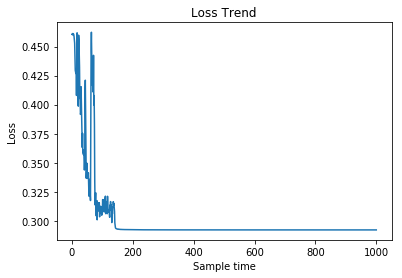

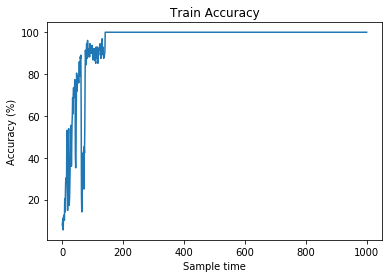

In [6]:
plt.title('Loss Trend')

plt.plot(losses)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [7]:
def test(model, config, input_length):
    # Initialize the dataset and data loader (leave the +1)
    dataset = PalindromeDataset(input_length+1)
    data_loader = DataLoader(dataset, config.batch_size, num_workers=1)
    accuracies = []
    
    for step, (batch_inputs, batch_targets) in enumerate(data_loader):
        outputs = model(batch_inputs)
        accu = 0.0  
        
        if step % 10 == 0:
            accu = accuracy(outputs, batch_targets)
            accuracies.append(accu)
            
        if step == 2000:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            break

    print('Done testing.')
    
    return accuracies

In [8]:
test_accuracies = test(model, config, config.input_length)

Done testing.


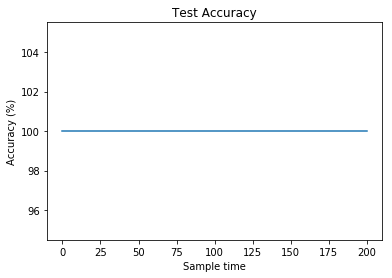

Palindromes Length: T = 11
Average accuracy over 2000 sampled test: 100.0 %


In [9]:
plt.title('Test Accuracy')

plt.plot(test_accuracies)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 11")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies)) + " %")

### Task2

In this case, I train and test the LSTM model with the Palindromes' length of 5, 15, 20, 25(T = 5, 15, 20, 25). 

The LSTM performance is very good even when Palindrome's length is 25. So I do observe a better performance when compared to the RNN I’ve implemented in the previous assignment, which is show in `./rnn_train.ipynb`.

#### T = 5:

In [10]:
model2, losses2, accuracies2 = train(config, 4)

__main__:35: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4606
Accuracy on training dataset: 7.812 %
[step:    10] loss: 0.4606
Accuracy on training dataset: 6.250 %
[step:    20] loss: 0.4596
Accuracy on training dataset: 11.719 %
[step:    30] loss: 0.4562
Accuracy on training dataset: 15.625 %
[step:    40] loss: 0.4554
Accuracy on training dataset: 11.719 %
[step:    50] loss: 0.4459
Accuracy on training dataset: 26.562 %
[step:    60] loss: 0.4403
Accuracy on training dataset: 23.438 %
[step:    70] loss: 0.4405
Accuracy on training dataset: 29.688 %
[step:    80] loss: 0.4282
Accuracy on training dataset: 47.656 %
[step:    90] loss: 0.4179
Accuracy on training dataset: 54.688 %
[step:   100] loss: 0.4152
Accuracy on training dataset: 52.344 %
[step:   110] loss: 0.3982
Accuracy on training dataset: 58.594 %
[step:   120] loss: 0.3980
Accuracy on training dataset: 66.406 %
[step:   130] loss: 0.3796
Accuracy on training dataset: 69.531 %
[step:   140] loss: 0.3673
Accuracy on training dataset: 73.438 %
[step:   150

[step:  1240] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1250] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1260] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1270] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1280] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1290] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1300] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1310] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1320] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1330] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1340] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1350] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1360] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  1370] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  1380] loss: 0.2923
Accuracy on training dataset: 100.0

[step:  2470] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2480] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2490] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2500] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2510] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2520] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2530] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2540] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2550] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2560] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2570] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2580] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2590] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2600] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2610] loss: 0.2923
Accuracy on training dataset: 100.0

[step:  3700] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3710] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3720] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3730] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3740] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3750] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3760] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3770] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3780] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3790] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3800] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3810] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3820] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3830] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3840] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  4930] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4940] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4950] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4960] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4970] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4990] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5000] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5010] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5020] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5030] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5040] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5050] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5060] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5070] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  6170] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6180] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6190] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6200] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6210] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6220] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6230] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6240] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6250] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6260] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6270] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6280] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6290] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6300] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6310] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  7410] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7420] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7430] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7440] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7450] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7460] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7470] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7480] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7490] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7500] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7510] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7520] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7530] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7540] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7550] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  8650] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8660] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8670] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8680] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8690] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8700] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8710] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8720] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8730] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8740] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8750] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8760] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8770] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8780] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8790] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  9890] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9900] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9910] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9920] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9930] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9940] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9950] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9960] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9970] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9990] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step: 10000] loss: 0.2922
Accuracy on training dataset: 100.000 %
Done training.


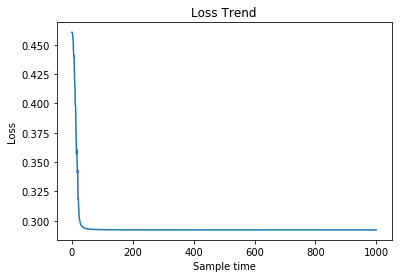

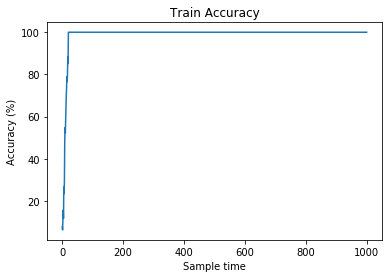

In [11]:
plt.title('Loss Trend')

plt.plot(losses2)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies2)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [12]:
test_accuracies2 = test(model2, config, 4)

Done testing.


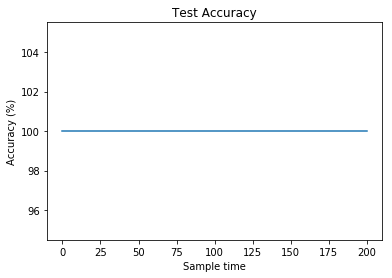

Palindromes Length: T = 5
Average accuracy over 2000 sampled test: 100.0 %


In [13]:
plt.title('Test Accuracy')

plt.plot(test_accuracies2)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 5")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies2)) + " %")

#### T = 15:

In [14]:
model3, losses3, accuracies3 = train(config, 14)

__main__:35: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4612
Accuracy on training dataset: 7.031 %
[step:    10] loss: 0.4607
Accuracy on training dataset: 9.375 %
[step:    20] loss: 0.4608
Accuracy on training dataset: 7.031 %
[step:    30] loss: 0.4603
Accuracy on training dataset: 14.062 %
[step:    40] loss: 0.4603
Accuracy on training dataset: 9.375 %
[step:    50] loss: 0.4601
Accuracy on training dataset: 14.062 %
[step:    60] loss: 0.4614
Accuracy on training dataset: 9.375 %
[step:    70] loss: 0.4607
Accuracy on training dataset: 9.375 %
[step:    80] loss: 0.4602
Accuracy on training dataset: 10.156 %
[step:    90] loss: 0.4610
Accuracy on training dataset: 7.812 %
[step:   100] loss: 0.4608
Accuracy on training dataset: 5.469 %
[step:   110] loss: 0.4603
Accuracy on training dataset: 11.719 %
[step:   120] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:   130] loss: 0.4607
Accuracy on training dataset: 8.594 %
[step:   140] loss: 0.4607
Accuracy on training dataset: 13.281 %
[step:   150] loss:

[step:  1240] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1250] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1260] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1270] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1280] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1290] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1300] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1310] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1320] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1330] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1340] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1350] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1360] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1370] loss: 0.2924
Accuracy on training dataset: 100.000 %
[step:  1380] loss: 0.2924
Accuracy on training dataset: 100.0

[step:  2470] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2480] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2490] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2500] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2510] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2520] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2530] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2540] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2550] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2560] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2570] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2580] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2590] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2600] loss: 0.2923
Accuracy on training dataset: 100.000 %
[step:  2610] loss: 0.2923
Accuracy on training dataset: 100.0

[step:  3700] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3710] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3720] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3730] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3740] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3750] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3760] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3770] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3780] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3790] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3800] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3810] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3820] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3830] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  3840] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  4930] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4940] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4950] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4960] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4970] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  4990] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5000] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5010] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5020] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5030] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5040] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5050] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5060] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  5070] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  6160] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6170] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6180] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6190] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6200] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6210] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6220] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6230] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6240] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6250] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6260] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6270] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6280] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6290] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  6300] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  7390] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7400] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7410] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7420] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7430] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7440] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7450] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7460] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7470] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7480] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7490] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7500] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7510] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7520] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  7530] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  8620] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8630] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8640] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8650] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8660] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8670] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8680] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8690] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8700] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8710] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8720] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8730] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8740] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8750] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  8760] loss: 0.2922
Accuracy on training dataset: 100.0

[step:  9850] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9860] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9870] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9880] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9890] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9900] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9910] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9920] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9930] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9940] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9950] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9960] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9970] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9980] loss: 0.2922
Accuracy on training dataset: 100.000 %
[step:  9990] loss: 0.2922
Accuracy on training dataset: 100.0

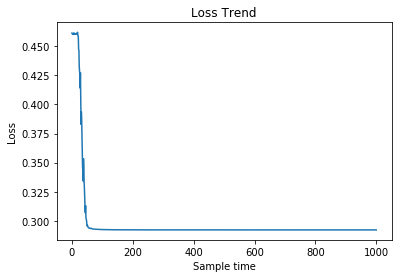

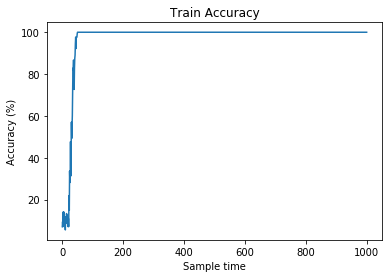

In [15]:
plt.title('Loss Trend')

plt.plot(losses3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [16]:
test_accuracies3 = test(model3, config, 14)

Done testing.


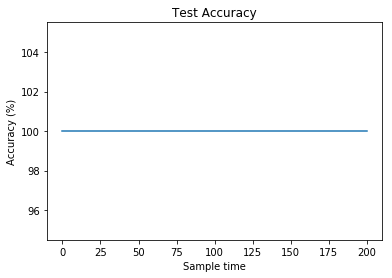

Palindromes Length: T = 15
Average accuracy over 2000 sampled test: 100.0 %


In [18]:
plt.title('Test Accuracy')

plt.plot(test_accuracies3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 15")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies3)) + " %")

#### T = 20:

In [33]:
def train_2(config, input_length, batch_size, learning_rate):

    # Initialize the model that we are going to use
    model = LSTM(input_length, config.input_dim, config.num_hidden, config.num_classes, batch_size)  # fixme

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Initialize the dataset and data loader (leave the +1)
    dataset = PalindromeDataset(input_length+1)
    data_loader = DataLoader(dataset, batch_size, num_workers=1)

    # Setup the loss and optimizer
    criterion = nn.CrossEntropyLoss()  # fixme
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # fixme
#     optimizer = torch.optim.RMSprop(model.parameters(), lr=config.learning_rate)
    
    losses = []
    accuracies = []
    loss = 0.0
    counter = 0
    flag1 = 0
    flag2 = 0

    for step, (batch_inputs, batch_targets) in enumerate(data_loader):

        # Add more code here ...
        optimizer.zero_grad() 
        batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)   

        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)
        loss.backward()
        optimizer.step()

        # the following line is to deal with exploding gradients
        torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)

        # Add more code here ...

        loss += loss.item()   # fixme
        accu = 0.0  # fixme
        

        if step % 10 == 0:
            # print acuracy/loss here
            print('[step: %5d] loss: %.4f' %
                          (step, loss / 10))
            losses.append(loss / 10)
            loss = 0.0
            accu = accuracy(outputs, batch_targets)
            accuracies.append(accu)
            print('Accuracy on training dataset: %.3f %%' % (accu))
            
            if accu > 90 and flag1 == 0:
                flag1 = 1
                for params_group in optimizer.param_groups:
                    params_group['lr'] = learning_rate / 2
            
            if accu == 100:
                counter += 1
                if flag2 == 0:
                    falg2 = 1
                    for params_group in optimizer.param_groups:
                        params_group['lr'] = learning_rate / 4
                
            if counter == 45:
                break
            else:
                counter = 0

        if step == config.train_steps:
            # If you receive a PyTorch data-loader error, check this bug report:
            # https://github.com/pytorch/pytorch/pull/9655
            break

    print('Done training.')
    
    return model, losses, accuracies

In [37]:
model4, losses4, accuracies4 = train_2(config, 19, 128, 0.0002)

__main__:37: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4609
Accuracy on training dataset: 5.469 %
[step:    10] loss: 0.4605
Accuracy on training dataset: 10.156 %
[step:    20] loss: 0.4602
Accuracy on training dataset: 14.844 %
[step:    30] loss: 0.4609
Accuracy on training dataset: 7.812 %
[step:    40] loss: 0.4603
Accuracy on training dataset: 13.281 %
[step:    50] loss: 0.4602
Accuracy on training dataset: 14.844 %
[step:    60] loss: 0.4602
Accuracy on training dataset: 10.938 %
[step:    70] loss: 0.4597
Accuracy on training dataset: 15.625 %
[step:    80] loss: 0.4607
Accuracy on training dataset: 10.156 %
[step:    90] loss: 0.4606
Accuracy on training dataset: 9.375 %
[step:   100] loss: 0.4609
Accuracy on training dataset: 6.250 %
[step:   110] loss: 0.4604
Accuracy on training dataset: 10.938 %
[step:   120] loss: 0.4606
Accuracy on training dataset: 9.375 %
[step:   130] loss: 0.4604
Accuracy on training dataset: 10.938 %
[step:   140] loss: 0.4605
Accuracy on training dataset: 9.375 %
[step:   150] lo

[step:  1250] loss: 0.3782
Accuracy on training dataset: 61.719 %
[step:  1260] loss: 0.3554
Accuracy on training dataset: 75.781 %
[step:  1270] loss: 0.3833
Accuracy on training dataset: 58.594 %
[step:  1280] loss: 0.3826
Accuracy on training dataset: 53.125 %
[step:  1290] loss: 0.3622
Accuracy on training dataset: 68.750 %
[step:  1300] loss: 0.3605
Accuracy on training dataset: 68.750 %
[step:  1310] loss: 0.3538
Accuracy on training dataset: 70.312 %
[step:  1320] loss: 0.3747
Accuracy on training dataset: 57.031 %
[step:  1330] loss: 0.3671
Accuracy on training dataset: 64.062 %
[step:  1340] loss: 0.3624
Accuracy on training dataset: 67.969 %
[step:  1350] loss: 0.3541
Accuracy on training dataset: 72.656 %
[step:  1360] loss: 0.3553
Accuracy on training dataset: 75.000 %
[step:  1370] loss: 0.3594
Accuracy on training dataset: 67.969 %
[step:  1380] loss: 0.3515
Accuracy on training dataset: 78.906 %
[step:  1390] loss: 0.3611
Accuracy on training dataset: 66.406 %
[step:  14

[step:  2500] loss: 0.3273
Accuracy on training dataset: 82.031 %
[step:  2510] loss: 0.3295
Accuracy on training dataset: 80.469 %
[step:  2520] loss: 0.3301
Accuracy on training dataset: 81.250 %
[step:  2530] loss: 0.3389
Accuracy on training dataset: 77.344 %
[step:  2540] loss: 0.3272
Accuracy on training dataset: 89.062 %
[step:  2550] loss: 0.3352
Accuracy on training dataset: 78.906 %
[step:  2560] loss: 0.3241
Accuracy on training dataset: 81.250 %
[step:  2570] loss: 0.3322
Accuracy on training dataset: 79.688 %
[step:  2580] loss: 0.3360
Accuracy on training dataset: 78.125 %
[step:  2590] loss: 0.3231
Accuracy on training dataset: 88.281 %
[step:  2600] loss: 0.3314
Accuracy on training dataset: 81.250 %
[step:  2610] loss: 0.3304
Accuracy on training dataset: 78.906 %
[step:  2620] loss: 0.3296
Accuracy on training dataset: 79.688 %
[step:  2630] loss: 0.3308
Accuracy on training dataset: 82.812 %
[step:  2640] loss: 0.3259
Accuracy on training dataset: 82.812 %
[step:  26

[step:  3750] loss: 0.3123
Accuracy on training dataset: 93.750 %
[step:  3760] loss: 0.3077
Accuracy on training dataset: 97.656 %
[step:  3770] loss: 0.3106
Accuracy on training dataset: 95.312 %
[step:  3780] loss: 0.3046
Accuracy on training dataset: 98.438 %
[step:  3790] loss: 0.3136
Accuracy on training dataset: 93.750 %
[step:  3800] loss: 0.3112
Accuracy on training dataset: 95.312 %
[step:  3810] loss: 0.3087
Accuracy on training dataset: 97.656 %
[step:  3820] loss: 0.3111
Accuracy on training dataset: 94.531 %
[step:  3830] loss: 0.3009
Accuracy on training dataset: 100.000 %
[step:  3840] loss: 0.3091
Accuracy on training dataset: 96.875 %
[step:  3850] loss: 0.3052
Accuracy on training dataset: 97.656 %
[step:  3860] loss: 0.3088
Accuracy on training dataset: 97.656 %
[step:  3870] loss: 0.3046
Accuracy on training dataset: 100.000 %
[step:  3880] loss: 0.3066
Accuracy on training dataset: 96.875 %
[step:  3890] loss: 0.3083
Accuracy on training dataset: 98.438 %
[step:  

[step:  4990] loss: 0.2981
Accuracy on training dataset: 100.000 %
[step:  5000] loss: 0.2977
Accuracy on training dataset: 100.000 %
[step:  5010] loss: 0.2979
Accuracy on training dataset: 100.000 %
[step:  5020] loss: 0.2970
Accuracy on training dataset: 100.000 %
[step:  5030] loss: 0.2970
Accuracy on training dataset: 100.000 %
[step:  5040] loss: 0.3008
Accuracy on training dataset: 98.438 %
[step:  5050] loss: 0.2978
Accuracy on training dataset: 100.000 %
[step:  5060] loss: 0.2965
Accuracy on training dataset: 100.000 %
[step:  5070] loss: 0.2970
Accuracy on training dataset: 100.000 %
[step:  5080] loss: 0.2959
Accuracy on training dataset: 100.000 %
[step:  5090] loss: 0.2982
Accuracy on training dataset: 99.219 %
[step:  5100] loss: 0.2959
Accuracy on training dataset: 100.000 %
[step:  5110] loss: 0.2999
Accuracy on training dataset: 97.656 %
[step:  5120] loss: 0.2978
Accuracy on training dataset: 100.000 %
[step:  5130] loss: 0.2973
Accuracy on training dataset: 99.219 %

[step:  6220] loss: 0.2942
Accuracy on training dataset: 100.000 %
[step:  6230] loss: 0.2952
Accuracy on training dataset: 100.000 %
[step:  6240] loss: 0.2952
Accuracy on training dataset: 100.000 %
[step:  6250] loss: 0.2939
Accuracy on training dataset: 100.000 %
[step:  6260] loss: 0.2942
Accuracy on training dataset: 100.000 %
[step:  6270] loss: 0.2947
Accuracy on training dataset: 100.000 %
[step:  6280] loss: 0.2939
Accuracy on training dataset: 100.000 %
[step:  6290] loss: 0.2950
Accuracy on training dataset: 100.000 %
[step:  6300] loss: 0.2943
Accuracy on training dataset: 100.000 %
[step:  6310] loss: 0.2942
Accuracy on training dataset: 100.000 %
[step:  6320] loss: 0.2944
Accuracy on training dataset: 100.000 %
[step:  6330] loss: 0.2939
Accuracy on training dataset: 100.000 %
[step:  6340] loss: 0.2940
Accuracy on training dataset: 100.000 %
[step:  6350] loss: 0.2938
Accuracy on training dataset: 100.000 %
[step:  6360] loss: 0.2941
Accuracy on training dataset: 100.0

[step:  7450] loss: 0.2933
Accuracy on training dataset: 100.000 %
[step:  7460] loss: 0.2931
Accuracy on training dataset: 100.000 %
[step:  7470] loss: 0.2931
Accuracy on training dataset: 100.000 %
[step:  7480] loss: 0.2934
Accuracy on training dataset: 100.000 %
[step:  7490] loss: 0.2931
Accuracy on training dataset: 100.000 %
[step:  7500] loss: 0.2932
Accuracy on training dataset: 100.000 %
[step:  7510] loss: 0.2929
Accuracy on training dataset: 100.000 %
[step:  7520] loss: 0.2933
Accuracy on training dataset: 100.000 %
[step:  7530] loss: 0.2932
Accuracy on training dataset: 100.000 %
[step:  7540] loss: 0.2932
Accuracy on training dataset: 100.000 %
[step:  7550] loss: 0.2931
Accuracy on training dataset: 100.000 %
[step:  7560] loss: 0.2931
Accuracy on training dataset: 100.000 %
[step:  7570] loss: 0.2929
Accuracy on training dataset: 100.000 %
[step:  7580] loss: 0.2932
Accuracy on training dataset: 100.000 %
[step:  7590] loss: 0.2930
Accuracy on training dataset: 100.0

[step:  8680] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8690] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8700] loss: 0.2928
Accuracy on training dataset: 100.000 %
[step:  8710] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8720] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8730] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8740] loss: 0.2928
Accuracy on training dataset: 100.000 %
[step:  8750] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8760] loss: 0.2926
Accuracy on training dataset: 100.000 %
[step:  8770] loss: 0.2928
Accuracy on training dataset: 100.000 %
[step:  8780] loss: 0.2928
Accuracy on training dataset: 100.000 %
[step:  8790] loss: 0.2926
Accuracy on training dataset: 100.000 %
[step:  8800] loss: 0.2927
Accuracy on training dataset: 100.000 %
[step:  8810] loss: 0.2928
Accuracy on training dataset: 100.000 %
[step:  8820] loss: 0.2928
Accuracy on training dataset: 100.0

[step:  9910] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9920] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9930] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9940] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9950] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9960] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9970] loss: 0.2925
Accuracy on training dataset: 100.000 %
[step:  9980] loss: 0.2926
Accuracy on training dataset: 100.000 %
[step:  9990] loss: 0.2926
Accuracy on training dataset: 100.000 %
[step: 10000] loss: 0.2926
Accuracy on training dataset: 100.000 %
Done training.


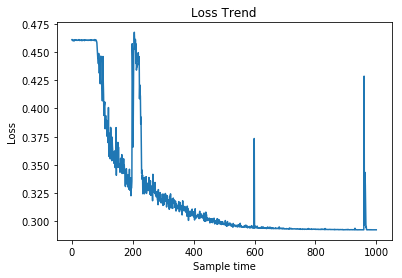

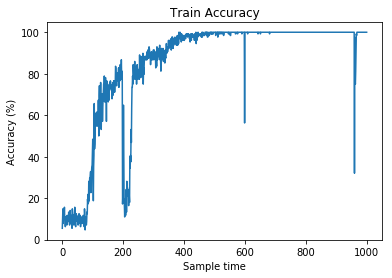

In [38]:
plt.title('Loss Trend')

plt.plot(losses4)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies4)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [40]:
test_accuracies4 = test(model4, config, 19)

Done testing.


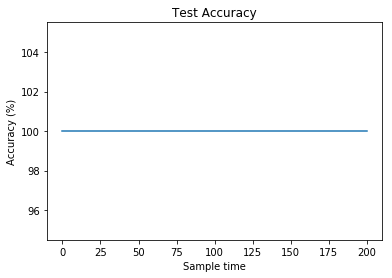

Palindromes Length: T = 20
Average accuracy over 2000 sampled test: 100.0 %


In [42]:
plt.title('Test Accuracy')

plt.plot(test_accuracies3)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 20")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies4)) + " %")

#### T = 25:

In [43]:
model5, losses5, accuracies5 = train_2(config, 24, 128, 0.0001)

__main__:37: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


[step:     0] loss: 0.4607
Accuracy on training dataset: 7.812 %
[step:    10] loss: 0.4609
Accuracy on training dataset: 9.375 %
[step:    20] loss: 0.4606
Accuracy on training dataset: 16.406 %
[step:    30] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:    40] loss: 0.4608
Accuracy on training dataset: 10.156 %
[step:    50] loss: 0.4604
Accuracy on training dataset: 12.500 %
[step:    60] loss: 0.4608
Accuracy on training dataset: 8.594 %
[step:    70] loss: 0.4606
Accuracy on training dataset: 8.594 %
[step:    80] loss: 0.4605
Accuracy on training dataset: 10.156 %
[step:    90] loss: 0.4606
Accuracy on training dataset: 5.469 %
[step:   100] loss: 0.4604
Accuracy on training dataset: 6.250 %
[step:   110] loss: 0.4603
Accuracy on training dataset: 12.500 %
[step:   120] loss: 0.4608
Accuracy on training dataset: 13.281 %
[step:   130] loss: 0.4603
Accuracy on training dataset: 14.062 %
[step:   140] loss: 0.4604
Accuracy on training dataset: 8.594 %
[step:   150] los

[step:  1260] loss: 0.4605
Accuracy on training dataset: 9.375 %
[step:  1270] loss: 0.4606
Accuracy on training dataset: 8.594 %
[step:  1280] loss: 0.4603
Accuracy on training dataset: 10.938 %
[step:  1290] loss: 0.4606
Accuracy on training dataset: 7.031 %
[step:  1300] loss: 0.4605
Accuracy on training dataset: 11.719 %
[step:  1310] loss: 0.4605
Accuracy on training dataset: 8.594 %
[step:  1320] loss: 0.4606
Accuracy on training dataset: 9.375 %
[step:  1330] loss: 0.4603
Accuracy on training dataset: 13.281 %
[step:  1340] loss: 0.4605
Accuracy on training dataset: 11.719 %
[step:  1350] loss: 0.4607
Accuracy on training dataset: 5.469 %
[step:  1360] loss: 0.4607
Accuracy on training dataset: 7.812 %
[step:  1370] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:  1380] loss: 0.4604
Accuracy on training dataset: 10.156 %
[step:  1390] loss: 0.4606
Accuracy on training dataset: 11.719 %
[step:  1400] loss: 0.4605
Accuracy on training dataset: 7.031 %
[step:  1410] loss

[step:  2520] loss: 0.4602
Accuracy on training dataset: 6.250 %
[step:  2530] loss: 0.4609
Accuracy on training dataset: 10.156 %
[step:  2540] loss: 0.4605
Accuracy on training dataset: 12.500 %
[step:  2550] loss: 0.4602
Accuracy on training dataset: 10.156 %
[step:  2560] loss: 0.4606
Accuracy on training dataset: 10.156 %
[step:  2570] loss: 0.4603
Accuracy on training dataset: 14.062 %
[step:  2580] loss: 0.4602
Accuracy on training dataset: 12.500 %
[step:  2590] loss: 0.4610
Accuracy on training dataset: 10.938 %
[step:  2600] loss: 0.4608
Accuracy on training dataset: 10.156 %
[step:  2610] loss: 0.4607
Accuracy on training dataset: 8.594 %
[step:  2620] loss: 0.4606
Accuracy on training dataset: 12.500 %
[step:  2630] loss: 0.4602
Accuracy on training dataset: 6.250 %
[step:  2640] loss: 0.4604
Accuracy on training dataset: 7.812 %
[step:  2650] loss: 0.4603
Accuracy on training dataset: 12.500 %
[step:  2660] loss: 0.4605
Accuracy on training dataset: 10.156 %
[step:  2670] 

[step:  3770] loss: 0.3900
Accuracy on training dataset: 54.688 %
[step:  3780] loss: 0.3775
Accuracy on training dataset: 63.281 %
[step:  3790] loss: 0.3805
Accuracy on training dataset: 60.156 %
[step:  3800] loss: 0.3941
Accuracy on training dataset: 50.000 %
[step:  3810] loss: 0.3622
Accuracy on training dataset: 65.625 %
[step:  3820] loss: 0.3828
Accuracy on training dataset: 50.781 %
[step:  3830] loss: 0.3681
Accuracy on training dataset: 60.938 %
[step:  3840] loss: 0.3743
Accuracy on training dataset: 60.156 %
[step:  3850] loss: 0.3825
Accuracy on training dataset: 53.906 %
[step:  3860] loss: 0.3720
Accuracy on training dataset: 61.719 %
[step:  3870] loss: 0.3760
Accuracy on training dataset: 58.594 %
[step:  3880] loss: 0.3768
Accuracy on training dataset: 62.500 %
[step:  3890] loss: 0.3722
Accuracy on training dataset: 63.281 %
[step:  3900] loss: 0.3659
Accuracy on training dataset: 65.625 %
[step:  3910] loss: 0.3605
Accuracy on training dataset: 64.844 %
[step:  39

[step:  5020] loss: 0.4353
Accuracy on training dataset: 22.656 %
[step:  5030] loss: 0.3747
Accuracy on training dataset: 60.938 %
[step:  5040] loss: 0.3601
Accuracy on training dataset: 64.062 %
[step:  5050] loss: 0.3650
Accuracy on training dataset: 63.281 %
[step:  5060] loss: 0.3564
Accuracy on training dataset: 68.750 %
[step:  5070] loss: 0.3536
Accuracy on training dataset: 68.750 %
[step:  5080] loss: 0.3556
Accuracy on training dataset: 65.625 %
[step:  5090] loss: 0.3548
Accuracy on training dataset: 66.406 %
[step:  5100] loss: 0.3567
Accuracy on training dataset: 69.531 %
[step:  5110] loss: 0.3502
Accuracy on training dataset: 70.312 %
[step:  5120] loss: 0.3536
Accuracy on training dataset: 70.312 %
[step:  5130] loss: 0.3638
Accuracy on training dataset: 62.500 %
[step:  5140] loss: 0.3482
Accuracy on training dataset: 72.656 %
[step:  5150] loss: 0.3601
Accuracy on training dataset: 63.281 %
[step:  5160] loss: 0.3666
Accuracy on training dataset: 58.594 %
[step:  51

[step:  6270] loss: 0.3165
Accuracy on training dataset: 89.844 %
[step:  6280] loss: 0.3175
Accuracy on training dataset: 90.625 %
[step:  6290] loss: 0.3169
Accuracy on training dataset: 90.625 %
[step:  6300] loss: 0.3240
Accuracy on training dataset: 85.938 %
[step:  6310] loss: 0.3164
Accuracy on training dataset: 90.625 %
[step:  6320] loss: 0.3267
Accuracy on training dataset: 84.375 %
[step:  6330] loss: 0.3166
Accuracy on training dataset: 90.625 %
[step:  6340] loss: 0.3156
Accuracy on training dataset: 90.625 %
[step:  6350] loss: 0.3268
Accuracy on training dataset: 84.375 %
[step:  6360] loss: 0.3163
Accuracy on training dataset: 89.844 %
[step:  6370] loss: 0.3199
Accuracy on training dataset: 88.281 %
[step:  6380] loss: 0.3251
Accuracy on training dataset: 85.938 %
[step:  6390] loss: 0.3144
Accuracy on training dataset: 90.625 %
[step:  6400] loss: 0.3250
Accuracy on training dataset: 85.156 %
[step:  6410] loss: 0.3129
Accuracy on training dataset: 91.406 %
[step:  64

[step:  7520] loss: 0.3132
Accuracy on training dataset: 90.625 %
[step:  7530] loss: 0.3102
Accuracy on training dataset: 92.188 %
[step:  7540] loss: 0.3171
Accuracy on training dataset: 88.281 %
[step:  7550] loss: 0.3150
Accuracy on training dataset: 89.062 %
[step:  7560] loss: 0.3131
Accuracy on training dataset: 90.625 %
[step:  7570] loss: 0.3118
Accuracy on training dataset: 91.406 %
[step:  7580] loss: 0.3159
Accuracy on training dataset: 89.062 %
[step:  7590] loss: 0.3084
Accuracy on training dataset: 92.969 %
[step:  7600] loss: 0.3109
Accuracy on training dataset: 91.406 %
[step:  7610] loss: 0.3162
Accuracy on training dataset: 89.062 %
[step:  7620] loss: 0.3090
Accuracy on training dataset: 92.969 %
[step:  7630] loss: 0.3050
Accuracy on training dataset: 94.531 %
[step:  7640] loss: 0.3244
Accuracy on training dataset: 84.375 %
[step:  7650] loss: 0.3236
Accuracy on training dataset: 85.156 %
[step:  7660] loss: 0.3067
Accuracy on training dataset: 93.750 %
[step:  76

[step:  8770] loss: 0.3116
Accuracy on training dataset: 92.969 %
[step:  8780] loss: 0.3112
Accuracy on training dataset: 96.094 %
[step:  8790] loss: 0.3108
Accuracy on training dataset: 94.531 %
[step:  8800] loss: 0.3086
Accuracy on training dataset: 96.094 %
[step:  8810] loss: 0.3048
Accuracy on training dataset: 99.219 %
[step:  8820] loss: 0.3099
Accuracy on training dataset: 95.312 %
[step:  8830] loss: 0.3085
Accuracy on training dataset: 96.875 %
[step:  8840] loss: 0.3098
Accuracy on training dataset: 94.531 %
[step:  8850] loss: 0.3099
Accuracy on training dataset: 96.094 %
[step:  8860] loss: 0.3112
Accuracy on training dataset: 96.875 %
[step:  8870] loss: 0.3062
Accuracy on training dataset: 97.656 %
[step:  8880] loss: 0.3098
Accuracy on training dataset: 92.969 %
[step:  8890] loss: 0.3042
Accuracy on training dataset: 100.000 %
[step:  8900] loss: 0.3139
Accuracy on training dataset: 93.750 %
[step:  8910] loss: 0.3067
Accuracy on training dataset: 96.094 %
[step:  8

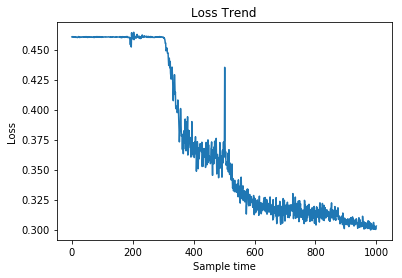

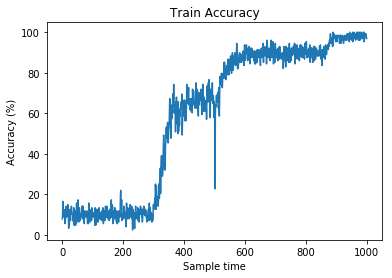

In [44]:
plt.title('Loss Trend')

plt.plot(losses5)
    
plt.xlabel('Sample time')
    
plt.ylabel('Loss')
    
plt.show()


plt.title('Train Accuracy')

plt.plot(accuracies5)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

In [45]:
test_accuracies5 = test(model5, config, 24)

Done testing.


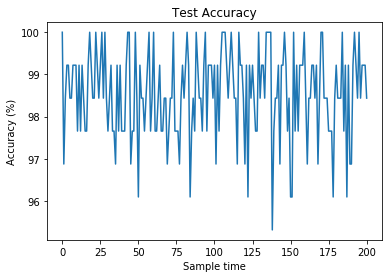

Palindromes Length: T = 25
Average accuracy over 2000 sampled test: 98.56576492537313 %


In [46]:
plt.title('Test Accuracy')

plt.plot(test_accuracies5)
    
plt.xlabel('Sample time')
    
plt.ylabel('Accuracy (%)')
    
plt.show()

print("Palindromes Length: T = 25")
print("Average accuracy over 2000 sampled test: " + str(np.mean(test_accuracies5)) + " %")

## Summary 

Here follows a figure which shows the accuracy on test data w.r.t. corresponding palindromes length, comparing between RNN and LSTM.

For vanilla RNN, as can be seen from `./train_RNN.ipynb`:

- when palindromes length = 5, accuracy on test data = 100%  (learning rate: 0.001)
- when palindromes length = 11, accuracy on test data = 89.87%  (learning rate: 0.001)
- when palindromes length = 15, accuracy on test data = 90.09%  (learning rate: 0.0004)
- when palindromes length = 20, accuracy on test data = 89.98%  (learning rate: 0.0002)
- when palindromes length = 25, accuracy on test data = 9.94%  (learning rate: 0.0001)

For LSTM, as can be seen here:

- when palindromes length = 5, accuracy on test data = 100%  (learning rate: 0.001)
- when palindromes length = 11, accuracy on test data = 100%  (learning rate: 0.001)
- when palindromes length = 15, accuracy on test data = 100%  (learning rate: 0.001)
- when palindromes length = 20, accuracy on test data = 100%  (learning rate: 0.0002)
- when palindromes length = 25, accuracy on test data = 98.57%  (learning rate: 0.0001)

*Tips: When input sequence length increases, I use the smaller learning rate.*

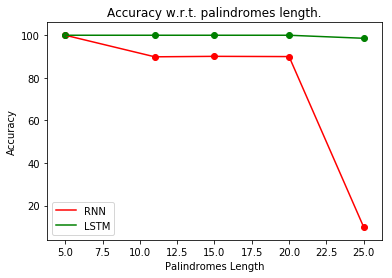

In [49]:
p1 = [5, 11, 15, 20, 25]
p2 = [100, 89.87, 90.09, 89.98, 9.94]

plt.title('Accuracy w.r.t. palindromes length.')
plt.plot(p1, p2, color='red', label='RNN')
plt.scatter(p1, p2, color='red')

p3 = [100, 100, 100, 100, 98.57]
plt.plot(p1, p3, color='green', label='LSTM')
plt.scatter(p1, p3, color='green')

plt.xlabel('Palindromes Length')
    
plt.ylabel('Accuracy')

plt.legend()
plt.show()